In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# <center>Perceptrons and Back propagation</center>

# Submit to moodle by the 25th November - Please submit a PDF version of your notebook

## One layer perceptron -  Linear separation

We start by generating _blobs_. In this setting data is linearly separable, we can thus use a single layer perceptron.

$$ \hat{y} = W^\top x + b $$
$$ \hat{P}(y_j = 1) = Softmax(\hat{y})_j $$

With $W \in M_{P,N}(\mathbb{R})$ and $b$ a vector of size $N$. $P,N$ the dimension of the input and the number of classes.

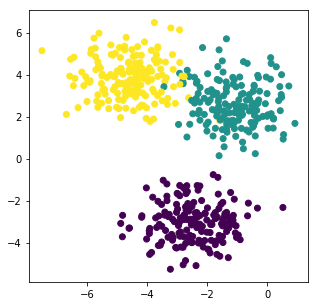

In [2]:
X, Y = make_blobs(n_samples=500, n_features=2)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()
Y = OneHotEncoder().fit_transform(Y.reshape(-1,1)).toarray()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

### Task 1: Implement softmax and the forward pass of a single layer percepton.

In [4]:
def softmax(y):
    """
    Takes the output of a layer as input and returns a probability distribution 
    input:
        y (np.array)
    
    returns:
        y (np.array)
    """
    aux = y.reshape(-1)
    aux = np.exp(aux)
    somme = aux.sum()
    aux = aux / somme
    
    return aux.reshape(-1,1)

def forward_one_layer(W, b, x):
    """
    Computes the forward pass of a single layer perceptron
    input:
        W (np.array): (INPUT_SHAPE, N_CLASSES) The weight matrix of the perceptron
        b (np.array): (N_CLASSES, 1) The bias matrix of the perceptron
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron

    returns:
        (np.array) (N_CLASSES, 1)
    """
    return W.T @ x + b

The loss typically associated with a classification problem is the cross entropy loss:
$$ loss = -\log(\hat{P}(y_j = 1)) $$
### Question 1 (2 points): Derive the gradients of loss with respect to $W$ and $b$.

$$\nabla_W loss = ?$$
$$\nabla_b loss = ?$$

***Answer:*** *We can write the loss function as:
$$
\begin{array}{rcl}
loss & = & -\log\left( \hat{P}(y_j = 1) \right) \\
 & = & -\log\left(Softmax(\hat{y})_j \right) \\
 & = & - \log \left( \dfrac{e^{y_j}}{\sum_{k=1}^{C} e^{y_k} } \right)   \\
 & = & \log \left( \sum_{k=1}^{C} e^{y_k} \right) - \log e^{y_j}  \\
 & = & \log \left( \sum_{k=1}^{C} e^{y_k} \right) - y_j \\
\end{array}
$$ 
where $y_k = W^T_{(k,\cdot)}x + b_k = \sum_{i=1}^{C} w_{i,k}x_i + b_k$.*

*Then, we have:*
- For $k \neq j$:
$$
\begin{array}{rcl}
\dfrac{\partial loss}{\partial W_{i,k}} & = & \dfrac{e^{y_k}}{\sum_{p=1}^{C} e^{y_p}} x_i  \\
 & = & Softmax(\hat{y})_k x_i
\end{array}
$$

$$
\begin{array}{rcl}
\dfrac{\partial loss}{\partial b_k} & = & \dfrac{e^{y_k}}{\sum_{p=1}^{C} e^{y_p} } \\
 & = & Softmax(\hat{y})_k
\end{array}
$$

- For $k = j$:
$$
\begin{array}{rcl}
\dfrac{\partial loss}{\partial W_{i,j}} & = & \dfrac{e^{y_j}}{\sum_{p=1}^{C} e^{y_p} } x_i - x_i \\
 & = & x_i \left( Softmax(\hat{y})_j - 1\right)  
\end{array}
$$

$$
\begin{array}{rcl}
\dfrac{\partial loss}{\partial b_j} & = & \dfrac{e^{y_j}}{\sum_{p=1}^{C} e^{y_p} } - 1 \\
 & = & Softmax(\hat{y})_j - 1
\end{array}
$$

Hence, we have:
$$
\begin{array}{rcl}
\nabla_W loss & = & 
\left[ \begin{array}{c} x_1 \\ \vdots \\ x_N \end{array} \right] 
\left(
\left[ \begin{array}{ccc} Softmax(\hat{y})_1 & \cdots & Softmax(\hat{y})_C \end{array} \right] 
-
\left[ \begin{array}{cccccc} 0 & \cdots & 0 & 1_{jth} & 0 & \cdots \end{array} \right] 
\right) \\
& = & x\left( Softmax(\hat{y})^T - y^T \right)
\end{array}
$$

$$
\begin{array}{rcl}
\nabla_b loss & = & 
\left[ \begin{array}{c} Softmax(\hat{y})_1 \\ \vdots \\ Softmax(\hat{y})_C \end{array} \right] 
-
\left[ \begin{array}{c} 0 \\ \vdots \\ 0 \\ 1_{jth} \\ 0 \\ \vdots \end{array} \right]  \\
& = & Softmax(\hat{y}) - y
\end{array}
$$



### Task 2: Implement the gradients

In [5]:
def compute_grads_one_layer(softmaxed, x, y):
    """
    inputs:
        softmaxed (np.array): (N_CLASSES, 1)
        y (np.array): (N_CLASSES, 1)
        x (np.array): (INPUT_SHAPE, 1)
        
    returns:
        d_W (np.array): (INPUT_SHAPE, N_CLASSES) Gradient of the loss with respect to the weight matrix
        d_b (np.array): (N_CLASSES, 1) Gradient of the loss with respect to the bias matrix 
    """
    d_W = x @ (softmaxed - y).T
    d_b = softmaxed - y
    
    return d_W, d_b

def compute_loss(softmaxed, y):
    """
    inputs:
        softmaxed (np.array): (N_CLASSES, 1)
        y (np.array): (N_CLASSES, 1)
        
    returns:
        (float)
    """
    return float( -np.log( softmaxed.T @ y ) )

### Question 2 (1 points): As a sanity check, we want to compare the gradients we calculated to approximated gradients. How could we do this ?

**Answer:** In order to check if the gradients are corrects, we can calculate approximate gradients and compare the gradients to them. The approximate gradients can be calculated according to the partial derivative definition:

$$
\dfrac{\partial f(x,y)}{\partial x} = \lim_{h\rightarrow 0} \dfrac{f(x+h,y) - f(x,y)}{h}
$$

We calculate then for each element of the gradient of the function. 

*Example:* For the $loss$ with respect to $W$, we have:

$$
\nabla_W loss_{(i,j)} = \lim_{h\rightarrow 0} \dfrac{loss(W + H) - loss(W)}{h}
$$

where $H = (h_{m,n})$, with $h_{m,n} = \left{ \begin{array}{cl} 0,&(m,n)\neq(i,j) \\ h,&(m,n)=(i,j) \end{array} \right.$.

### Task 3: Implement the approx gradient function for the weight matrix

In [6]:
def approx_grad_W(W, b, x, y, h=0.0001):
    """
    Approximates the gradient with respect to W
    input:
        W (np.array): (INPUT_SHAPE, N_CLASSES) The weight matrix of the perceptron
        b (np.array): (N_CLASSES, 1) The bias matrix of the perceptron
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron
        y  (np.array): (N_CLASSES, 1) The input of the perceptron
        h (float): variation

    returns:
        d_W_approx (np.array): (INPUT_SHAPE, N_CLASSES) 
    """
    # The approx gradient is (loss(W_(i,j)+h, b) - loss(W_(i,j), b)) / h
    y_0 = W.T @ x + b
    softmaxed = softmax(y_0)
    
    result = np.zeros(W.shape)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            h_matrix = np.zeros(W.shape)
            h_matrix[i][j] = h
            W_h = W + h_matrix
            y_0_h = W_h.T @ x + b
            softmaxed_h = softmax(y_0_h)
            result[i][j] = ( compute_loss(softmaxed_h, y) - compute_loss(softmaxed, y) ) / h
    
    return result

The following function trains the perceptron

In [7]:
def train_one_layer(X_train, Y_train, X_test, Y_test, lr,
                    n_it=1000, test_freq=10, random_seed=42):
    
    INPUT_SHAPE = X_train.shape[1]
    N_CLASSES = Y_train.shape[1]
    
    # Initialise metrics lists
    loss = []
    acc = []
    test_acc = []
    approx_grads = []
    grads = []
    
    # Initialisation of the weigths
    np.random.seed(random_seed)
    b = rand.normal(size=(N_CLASSES, 1))
    W = rand.normal(size=(INPUT_SHAPE, N_CLASSES))
    
    # Shuffling data
    indexes = rand.randint(X_train.shape[0], size=n_it)
    # training loop
    for it, i in enumerate(indexes):
        x = X_train[i,:].reshape(-1,1)
        y = Y_train[i,:].reshape(-1,1)

        # Forward passs
        softmaxed = forward_one_layer(W, b, x)
        # Back propagation
        d_W, d_b = compute_grads_one_layer(softmaxed, x, y)
        W -= lr * d_W
        b -= lr * d_b
        
        # Recording approximate gradients
        grads.append(d_W)
        approx_grads.append(approx_grad_W(W, b, x, y))
        
        # Metrics recording
        loss.append(compute_loss(softmaxed, y))
        acc.append(np.argmax(softmaxed) == np.argmax(y))
        
        # Test loop
        if it % test_freq == 0:
            acc_temp = []
            for i in range(X_test.shape[0]):
                x = X_train[i,:].reshape(-1,1)
                y = Y_train[i,:].reshape(-1,1)
                softmaxed = forward_one_layer(W, b, x)
                acc_temp.append(np.argmax(softmaxed) == np.argmax(y))
                
            test_acc.append(np.mean(acc_temp))

    return W, b, loss, acc, test_acc, np.stack(grads, -1), np.stack(approx_grads, -1)

### Task 4 (4 points): Using the previous function train the model. By producing an appropriate set of plots validate that it trained correctly and that you computed the correct gradients. Remember that a plot should be self explanatory.

C:\Users\Matheus Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


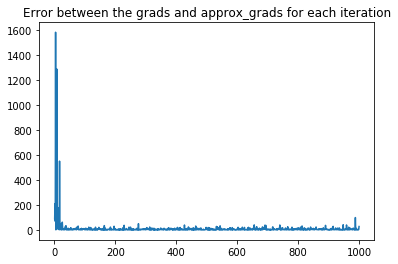

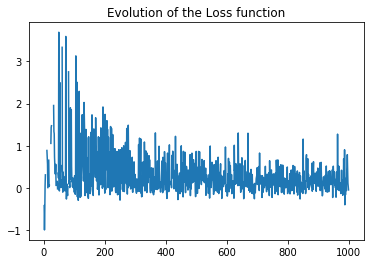

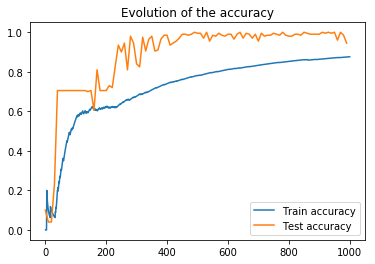

In [8]:
W, b, loss, acc, test_acc, grads, approx_grads = train_one_layer(X_train, Y_train, X_test, Y_test, 0.01)

iteration = [t+1 for t in range(1000)]

# Comparing the values between grads and approx_grads
error = []
for it in range(grads.shape[2]):
    aux = 0;
    for i in range(grads.shape[0]):
        for j in range(grads.shape[1]):
            aux += (grads[i][j][it] - approx_grads[i][j][it])**2
    error.append(aux)
    
plt.plot(iteration, error)
plt.title("Error between the grads and approx_grads for each iteration")
plt.show()

# evolution of loss function
plt.plot(iteration, loss)
plt.title("Evolution of the Loss function")
plt.show()

# Training data accuracy
freq = 10
acc_true = [a/b for a,b in zip(np.array(acc).cumsum(), range(1,len(acc)+1))]
plt.plot(iteration, acc_true, label="Train accuracy")
plt.plot([t*freq for t in range(100)], test_acc, label="Test accuracy")
plt.title("Evolution of the accuracy")
plt.legend()
plt.show()

# Non linearity

Now that the perceptron is trained, we can visualize its decision function. 

In [9]:
def plot_decision(X, Y, forward, figure=None):
    """Plots the decision function of a perceptron with respect to a forward funciton
    
    input:
        X, Y (np.array): Test data
        forward (function): only accepts x as input (Ex: lambda x: forward_one_layer(W, b, x))
        figure (plt.figure): optional, usefull if you dont want to generate any new figure, 
                    in the case of suplots.
    """
    markers=[".", "*", "D"]
    low0, high0 = np.min(X[:,0]), np.max(X[:,0])
    low1, high1 = np.min(X[:,1]), np.max(X[:,1])
    data = np.zeros((100,100,Y.shape[1]))
    for i1, x1 in enumerate(np.linspace(low0,high0,100)):
        for i2, x2 in enumerate(np.linspace(low1,high1,100)):
            x = np.array([x1, x2]).reshape(-1, 1)
            softmaxed = forward(x)
            data[i2, i1, :] = softmaxed.reshape(-1)
    if Y.shape[1] < 3:
        data = data[:,:,0]
    
    if figure is None:
        plt.figure(figsize=(10,10))
        
    plt.imshow(data, extent=(low0,high0,low1,high1), origin='lower', interpolation='gaussian')
    for c in range(Y.shape[1]):
        plt.scatter(X[np.argmax(Y, 1) == c, 0], X[np.argmax(Y, 1) == c, 1], c='k', 
                    marker=markers[c], label="class %i" % c)
        
    plt.legend()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


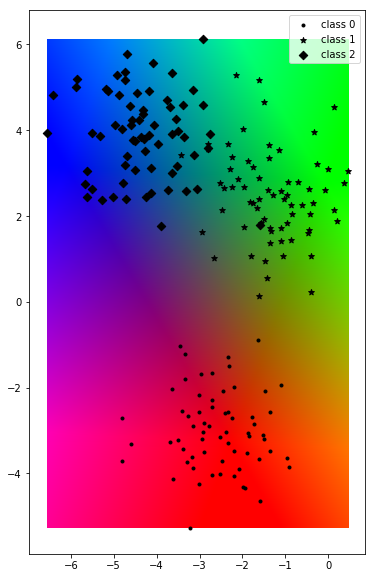

In [10]:
plot_decision(X_test, Y_test, lambda x: forward_one_layer(W, b, x))

The data we used was linearly separable, but what if it is not ? 

### Task 5 (1 point): Using the following data train a new perceptron and visualize its decision function. 

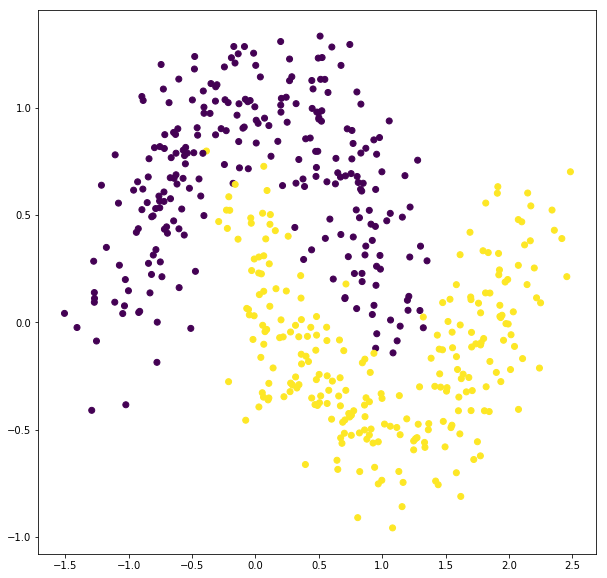

In [11]:
X, Y = make_moons(n_samples=500, noise=.2)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()
Y = OneHotEncoder().fit_transform(Y.reshape(-1,1)).toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

C:\Users\Matheus Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


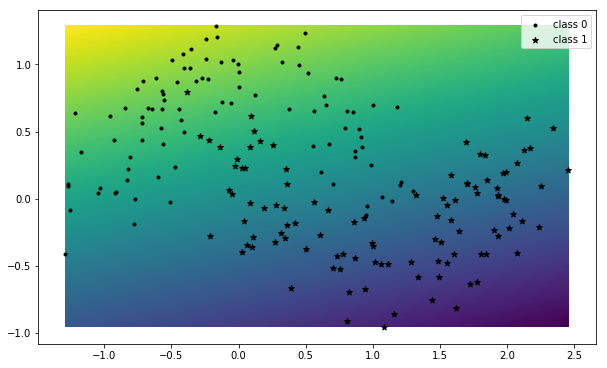

In [12]:
W, b, loss, acc, test_acc, grads, approx_grads = train_one_layer(X_train, Y_train, X_test, Y_test, 0.01)
plot_decision(X_test, Y_test, lambda x: forward_one_layer(W, b, x))

# Two Layer perceptron - Feed forward neural network

In neural networks, non linearity comes from having at least one hidden layer and a non linear activation function such as the $ReLU$ function.
$$ h = ReLU(W^{\top}_h x + b_h) $$
$$ \hat{y} = W^{\top}_o h + b_o $$
$$ \hat{P}(y_j = 1) = Softmax(\hat{y})_j $$

With $W_h \in M_{N,H}(\mathbb{R})$ and $W_o \in M_{C,H}(\mathbb{R})$ and $b^h$, $b^o$ vectors of corresponding dimensions. $H$ is the number of hidden units.

The $ReLU$ funciton is defined as:

$$ ReLU(x) = 
\begin{cases}
0 \textrm{ if } x < 0\\
x \textrm{ otherwise }
\end{cases}
$$

### Question 3 (2 points): Derive the gradients with respect to $W_h$ and $b_h$.

**Answer:**

We have that:
$$
\begin{array}{rcl}
    ReLU(x) & = & \max (0,x) \\
    \\
    ReLU'(x) & = & \dfrac{dReLU}{dx}(x) \\
             & = & \mathbb{1}_{\{x > 0\}} \\
             & = & \mathbb{1}_{\{ReLU(x) > 0\}} \\
             & = & ReLU'( ReLU(x) )
\end{array}
$$
Also, 
$$
\begin{array}{rcl}
    h_i & = & ReLU\left(W^T_{h(i,\cdot)} x + b_{h(i)} \right) \\
        & = & ReLU\left( \sum_k w_{h(k, i)} x + b_{h(i)} \right) \\
    \\
    \dfrac{\partial h_i}{\partial W_{h(u,v)}} & = & 
    \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        x_u ReLU'\left( \sum_k w_{h(k,i)}x_k + b_{h(i)} \right) & , & i = v 
    \end{array}
    \right. \\
    & = & 
    \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        x_u ReLU'(h_i) & , & i = v 
    \end{array}
    \right.\\
    \\
    \dfrac{\partial h_i}{\partial b_{h(v)}} & = & \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        ReLU'(h_i) & , & i = v
    \end{array}
    \right.
\end{array}
$$
Then, for the $\hat{y}$, we have:
$$
\begin{array}{rcl}
    \hat{y}_i & = & W^T_{0(i,\cdot)} h + b_{0(i)} \\
        & = & \sum_k w_{0(k,i)}h_k + b_{0(i)} \\
    \\
    \dfrac{\partial \hat{y}_i}{\partial W_{h(u,v)}} & = &  \displaystyle\sum_k w_{0(k,i)}\dfrac{\partial h_k}{\partial W_{h(u,v)}} \\
    & = & w_{0(v,i)}\dfrac{\partial h_v}{\partial W_{h(u,v)}} \\
    & = & w_{0(v,i)} x_u ReLU'( h_v ) \\
    \\
    \dfrac{\partial \hat{y}_i}{\partial b_{h(v)}} & = & w_{0(v,i)} ReLU'( h_v )
\end{array}
$$

Therefore, the gradients of the $loss$ with respect to $W_h$ and $b_h$ are:

$$
\begin{array}{rcl}
    loss & = & \log \left( \sum_k e^{y_k} \right) - y_j \\
    \\
    \dfrac{\partial loss}{\partial W_{h(u,v)}} & = & \dfrac{\sum_k e^{y_k} \frac{\partial y_k}{\partial W_{h(u,v)}}}{\sum_k e^{y_k}} - \dfrac{\partial y_j}{\partial W_{h(u,v)}} \\
    & = & \displaystyle\sum_k Softmax(\hat{y})_k \dfrac{\partial y_k}{\partial W_{h(u,v)}} - \dfrac{\partial y_j}{\partial W_{h(u,v)}} \\
    & = & \displaystyle\sum_k Softmax(\hat{y})_k w_{0(v,k)} x_u ReLU'(h_v) -\\
    & & w_{0(v,j)} x_u ReLU'( h_v )\\
    & = & x_u ReLU'( h_v ) W_{0(v,\cdot)} \left[  Softmax(\hat{y}) - y \right] \\
    \\
    \dfrac{\partial loss}{\partial b_{h(v)}} & = & ReLU'( h_v ) W_{0(v,\cdot)} \left[  Softmax(\hat{y}) - y \right]
\end{array}
$$

We can note that:

$$
\nabla_{W_h}loss = x\nabla_{b_h}loss^T = \left[ \begin{array}{c} x_1 \\ \vdots \\ x_p \end{array} \right] \left[ \begin{array}{ccc} \nabla_{b_h}loss^T_1 & \cdots & \nabla_{b_h}loss^T_h \end{array} \right]
$$


### Task 5 (5 points): Based on the previous implementation complete the following functions and train a 2 layers perceptron.

In [13]:
def relu(x):
    """
    input:
        x (np.array)
    
    returns:
        x (np.array)
    """
    aux = x.reshape(-1)
    result = np.zeros(len(aux))
    for i in range(len(result)):
        result[i] = max(0,aux[i])
    return result.reshape(-1,1)

def d_relu(x):
    """Computes the derivative of the relu
    input:
        x (np.array)
    
    returns:
        x (np.array)
    """
    aux = x.reshape(-1)
    result = np.zeros(len(aux))
    for i in range(len(result)):
        if aux[i] > 0:
            result[i] = 1
        else:
            result[i] = 0
    return result.reshape(-1,1)

def forward_two_layers(Wo, bo, Wh, bh, x):
    """Forward pass of a teo layer perceptron with relu activation
    input:
        Wh (np.array): (INPUT_SHAPE, HIDDEN_SHAPE) The weight matrix of the hidden layer
        Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) The weight matrix of the output layer
        bh (np.array): (HIDDEN_SHAPE, 1) The bias matrix of the hidden layer
        bo (np.array): (N_CLASSES, 1) The bias matrix of the output layer
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron

    returns:
        softmaxed (np.array): (N_CLASSES, 1) the output of the network after final activation
        hidden (np.array): (HIDDEN_SHAPE, 1) the output of the hidden layer after activation
        out (np.array): (N_CLASSES, 1) the output of the network before final activation
    """
    
    hidden = relu(Wh.T @ x + bh) # h
    out = Wo.T @ hidden + bo     # y_hat
    softmaxed = softmax(out)   # Softmax(y_hat)
    
    return softmaxed, hidden, out
    
def compute_grads_two_layers(hidden, softmaxed, Wo, x, y):
    """Forward pass of a teo layer perceptron with relu activation
    input:
        hidden (np.array): (HIDDENT_SHAPE, 1) the output of the hidden layer after activation
        softmaxed (np.array): (N_CLASSES, 1) the output of the network after final activation
        Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) The weight matrix of the output layer
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron
        y (np.array): (N_CLASSES, 1) Ground truth class
    
    returns:
        d_Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) Gradient with respect 
                        to the weight matrix of the output layer
        d_bo (np.array): (N_CLASSES, 1) Gradient with respect to the bias matrix of the output layer
        d_Wh (np.array): (INPUT_SHAPE, HIDDEN_SHAPE) Gradient with respect to the 
                        weight matrix of the hidden layer
        d_bh (np.array): (HIDDEN_SHAPE, 1) Gradient with respect to the bias matrix of the hidden layer
    """
    d_Wo, d_bo = compute_grads_one_layer(softmaxed, hidden, y)
    
    d_bh = np.zeros(hidden.shape)
    for i in range(d_bh.shape[0]):
        aux = d_relu(hidden)
        d_bh[i,0] = aux[i,0] * ( Wo[i,:] @ (softmaxed - y).reshape(-1) )
    
    d_Wh = np.outer(x, d_bh)
    
    return d_Wo, d_bo, d_Wh, d_bh
    
def train_two_layer(X_train, Y_train, X_test, Y_test, lr, n_hidden,
                    n_it=1000, test_freq=10, random_seed=42):

    INPUT_SHAPE = X_train.shape[1]
    N_CLASSES = Y_train.shape[1]
    
    # Initialise metrics lists
    loss = []
    acc = []
    test_acc = []
    approx_grads = []
    grads = []
    
    # Initialisation of the weigths
    np.random.seed(random_seed)
    bh = rand.normal(size=(n_hidden, 1))
    Wh = rand.normal(size=(INPUT_SHAPE, n_hidden))
    bo = rand.normal(size=(N_CLASSES, 1))
    Wo = rand.normal(size=(n_hidden, N_CLASSES))
    
    # Shuffling data
    indexes = rand.randint(X_train.shape[0], size=n_it)
    # training loop
    for it, i in enumerate(indexes):
        x = X_train[i,:].reshape(-1,1)
        y = Y_train[i,:].reshape(-1,1)

        # Forward passs
        softmaxed, hidden, out = forward_two_layers(Wo, bo, Wh, bh, x)

        # Back propagation
        d_Wo, d_bo, d_Wh, d_bh = compute_grads_two_layers(hidden, softmaxed, Wo, x, y)
        bh -= lr * d_bh
        Wh -= lr * d_Wh
        bo -= lr * d_bo
        Wo -= lr * d_Wo
        
        # Metrics recording
        loss.append(compute_loss(softmaxed, y))
        acc.append(np.argmax(softmaxed) == np.argmax(y))
        
        # Test loop
        if it % test_freq == 0:
            acc_temp = []
            for i in range(X_test.shape[0]):
                x = X_train[i,:].reshape(-1,1)
                y = Y_train[i,:].reshape(-1,1)
                softmaxed, hidden, out = forward_two_layers(Wo, bo, Wh, bh, x)
                acc_temp.append(np.argmax(softmaxed) == np.argmax(y))
                
            test_acc.append(np.mean(acc_temp))

    return Wo, bo, Wh, bh, loss, acc, test_acc

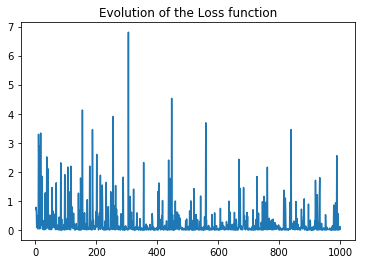

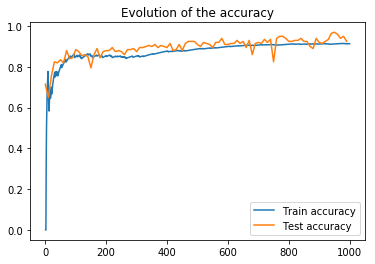

In [14]:
Wo, bo, Wh, bh, loss, acc, test_acc = train_two_layer(X_train, Y_train, X_test, Y_test, 0.1, 16)

iteration = [t+1 for t in range(1000)]

# evolution of loss function
plt.plot(iteration, loss)
plt.title("Evolution of the Loss function")
plt.show()

# Training data accuracy
freq = 10
acc_true = [a/b for a,b in zip(np.array(acc).cumsum(), range(1,len(acc)+1))]
plt.plot(iteration, acc_true, label="Train accuracy")
plt.plot([t*freq for t in range(100)], test_acc, label="Test accuracy")
plt.title("Evolution of the accuracy")
plt.legend()
plt.show()

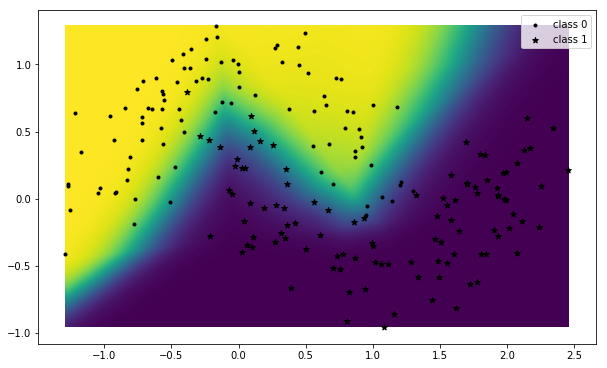

In [15]:
plot_decision(X_test, Y_test, lambda x: forward_two_layers(Wo, bo, Wh, bh, x)[0])

### Task 7 (3 points): The non linearity of the decision function is conditionned by the number of units, visualize this effect. What can you comment on the smoothness of the boundary ? (Be carefull, to visualize this you need to properly train the networks)

To better visualize this let's generate new data.

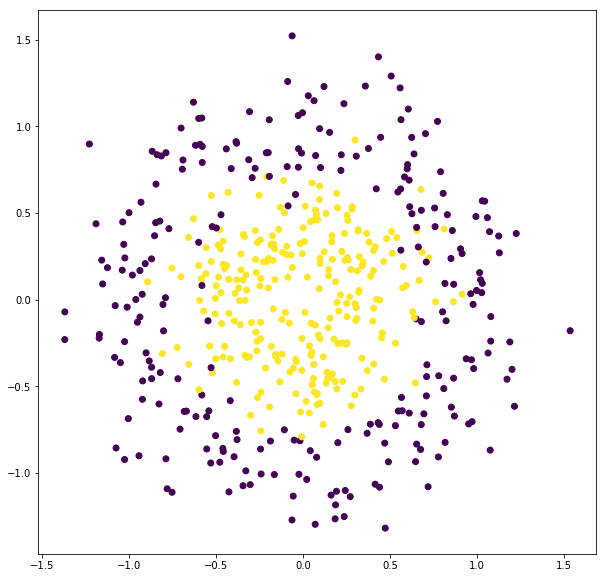

In [16]:
X, Y = make_circles(n_samples=500, noise=.2, factor=0.4)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()
Y = OneHotEncoder().fit_transform(Y.reshape(-1,1)).toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

**Answer:** 

We can see below the effect of the number of units to the decision function. The first one is linear and the second one is non-linear.

Also, the first one has a high smoothness on the boundaries, because the colors change gradually. In other hand, the second one possesses a low smoothness. The changes are abrupt and the boundaries are not smooths.

In the next task, we are going to see that if we change the activation function from $ReLU$ to $\tanh$, the boundaries become smoother.

C:\Users\Matheus Douglas\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


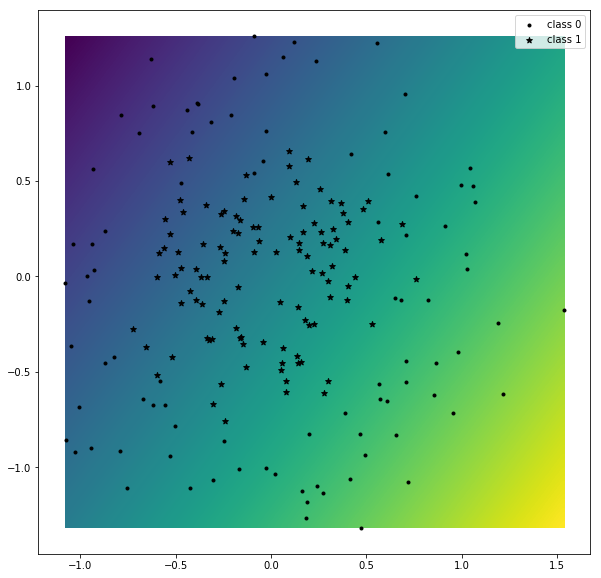

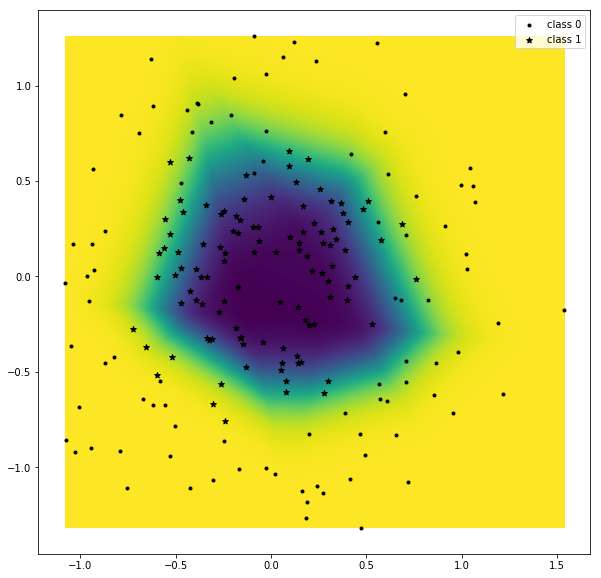

In [17]:
Wo, bo, Wh, bh, loss1, acc1, test_acc1 = train_two_layer(X_train, Y_train, X_test, Y_test, 0.1, 16)
W, b, loss2, acc2, test_acc2, grads2, approx_grads2 = train_one_layer(X_train, Y_train, X_test, Y_test, 0.01)

plot_decision(X_test, Y_test, lambda x: forward_one_layer(W, b, x))
plot_decision(X_test, Y_test, lambda x: forward_two_layers(Wo, bo, Wh, bh, x)[0])

### Task 8 (2 points): To have a smooth boundary we need to change the activation. Change the activation from relu to tanh, and vizualize the result.

If we use the activation to $\tanh$, we have that:

$$
\begin{array}{rcl}
    \tanh(x) & = & \dfrac{e^{2x}-1}{e^{2x}+1} \\
    \\
    \tanh'(x) & = & 1 - \tanh^2(x)\\
    \\
    h_i & = & \tanh\left(W^T_{h(i,\cdot)} x + b_{h(i)} \right) \\
        & = & \tanh\left( \sum_k w_{h(k, i)} x + b_{h(i)} \right) \\
    \\
    \dfrac{\partial h_i}{\partial W_{h(u,v)}} & = & 
    \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        x_u \tanh'\left( \sum_k w_{h(k,i)}x_k + b_{h(i)} \right) & , & i = v 
    \end{array}
    \right. \\
    & = & 
    \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        x_u (1 - h_i^2) & , & i = v 
    \end{array}
    \right.\\
    \\
    \dfrac{\partial h_i}{\partial b_{h(v)}} & = & \left\{
    \begin{array}{ccl}
        0 & , & i \neq v \\
        1 - h_i^2 & , & i = v
    \end{array}
    \right.\\
    \\
    \dfrac{\partial loss}{\partial W_{h(u,v)}} & = & x_u (1 - h_v^2) W_{0(v,\cdot)} \left[  Softmax(\hat{y}) - y \right] \\
    \\
    \dfrac{\partial loss}{\partial b_{h(v)}} & = & (1 - h_v^2) W_{0(v,\cdot)} \left[  Softmax(\hat{y}) - y \right]
\end{array}
$$


In [18]:
def tanh(x):
    """
    input:
        x (np.array)
    
    returns:
        x (np.array)
    """
    aux = x.reshape(-1)
    result = (np.exp(2*aux) - 1)/(np.exp(2*aux) + 1)
    return result.reshape(-1,1)

def d_tanh_hidden(hidden):
    """Computes the derivative of the tanh
    input:
        x (np.array)
    
    returns:
        x (np.array)
    """
    return 1 - hidden**2

def forward_two_layers(Wo, bo, Wh, bh, x):
    """Forward pass of a teo layer perceptron with tanh activation
    input:
        Wh (np.array): (INPUT_SHAPE, HIDDEN_SHAPE) The weight matrix of the hidden layer
        Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) The weight matrix of the output layer
        bh (np.array): (HIDDEN_SHAPE, 1) The bias matrix of the hidden layer
        bo (np.array): (N_CLASSES, 1) The bias matrix of the output layer
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron

    returns:
        softmaxed (np.array): (N_CLASSES, 1) the output of the network after final activation
        hidden (np.array): (HIDDEN_SHAPE, 1) the output of the hidden layer after activation
        out (np.array): (N_CLASSES, 1) the output of the network before final activation
    """
    
    hidden = tanh(Wh.T @ x + bh) # h
    out = Wo.T @ hidden + bo     # y_hat
    softmaxed = softmax(out)   # Softmax(y_hat)
    
    return softmaxed, hidden, out
    
def compute_grads_two_layers(hidden, softmaxed, Wo, x, y):
    """Forward pass of a teo layer perceptron with tanh activation
    input:
        hidden (np.array): (HIDDENT_SHAPE, 1) the output of the hidden layer after activation
        softmaxed (np.array): (N_CLASSES, 1) the output of the network after final activation
        Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) The weight matrix of the output layer
        x (np.array): (INPUT_SHAPE, 1) The input of the perceptron
        y (np.array): (N_CLASSES, 1) Ground truth class
    
    returns:
        d_Wo (np.array): (HIDDEN_SHAPE, N_CLASSES) Gradient with respect 
                        to the weight matrix of the output layer
        d_bo (np.array): (N_CLASSES, 1) Gradient with respect to the bias matrix of the output layer
        d_Wh (np.array): (INPUT_SHAPE, HIDDEN_SHAPE) Gradient with respect to the 
                        weight matrix of the hidden layer
        d_bh (np.array): (HIDDEN_SHAPE, 1) Gradient with respect to the bias matrix of the hidden layer
    """
    d_Wo, d_bo = compute_grads_one_layer(softmaxed, hidden, y)
    
    d_bh = np.zeros(hidden.shape)
    for i in range(d_bh.shape[0]):
        aux = d_tanh_hidden(hidden)
        d_bh[i,0] = aux[i,0] * ( Wo[i,:] @ (softmaxed - y).reshape(-1) )
    
    d_Wh = np.outer(x, d_bh)
    
    return d_Wo, d_bo, d_Wh, d_bh

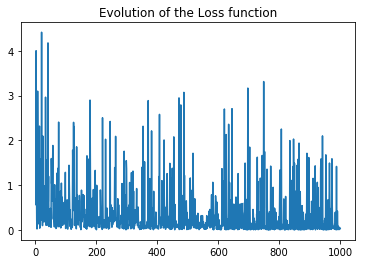

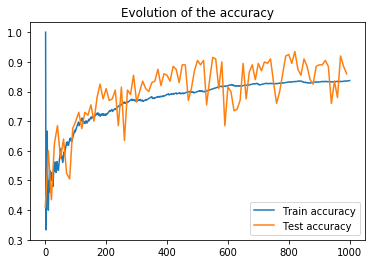

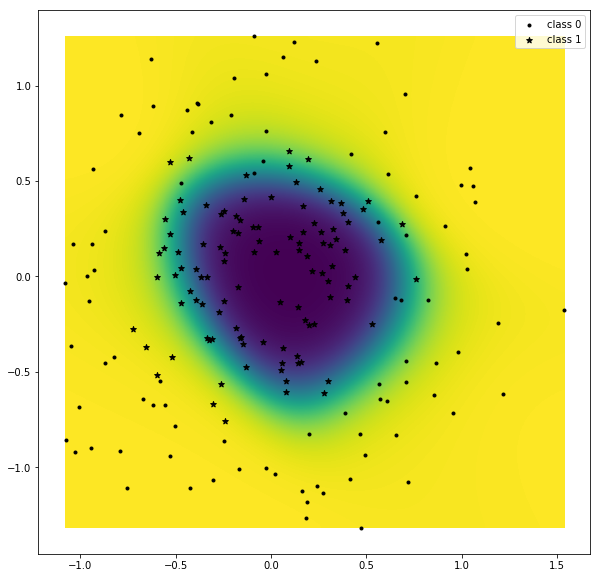

In [19]:
Wo, bo, Wh, bh, loss, acc, test_acc = train_two_layer(X_train, Y_train, X_test, Y_test, 0.1, 16)

iteration = [t+1 for t in range(1000)]

# evolution of loss function
plt.plot(iteration, loss)
plt.title("Evolution of the Loss function")
plt.show()

# Training data accuracy
freq = 10
acc_true = [a/b for a,b in zip(np.array(acc).cumsum(), range(1,len(acc)+1))]
plt.plot(iteration, acc_true, label="Train accuracy")
plt.plot([t*freq for t in range(100)], test_acc, label="Test accuracy")
plt.title("Evolution of the accuracy")
plt.legend()
plt.show()

plot_decision(X_test, Y_test, lambda x: forward_two_layers(Wo, bo, Wh, bh, x)[0])